In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("cancer.csv")

In [3]:
df.replace('?',-99999,inplace=True)
df.drop(columns=['id'], inplace=True)

In [4]:
df.isnull().sum()

clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
classes                   0
dtype: int64

In [5]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


<Axes: >

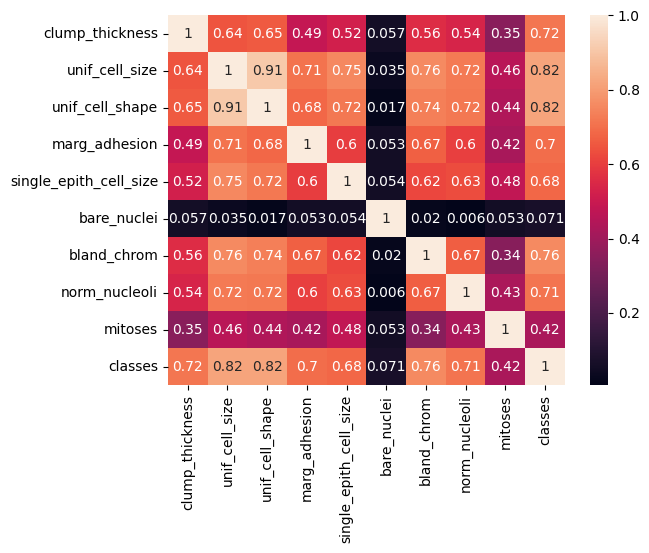

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.drop(columns=['bare_nuclei'], inplace=True)

In [8]:
features = df[['clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_cell_size','bland_chrom','norm_nucleoli','mitoses']]
target = df['classes']
labels = df['classes']

In [9]:
df.shape

(699, 9)

In [10]:
labels.unique()

array([0, 1], dtype=int64)

In [11]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import tree

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =42)

In [13]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },

    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [int(x) for x in np.linspace(start=1, stop=20, num=10)],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50],
            'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    }
}

}

In [14]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(Xtrain,Ytrain)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [15]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

,model_name,best_estimator,best_score
0,RandomForest,"(DecisionTreeClassifier(ccp_alpha=0.045, max_d...",0.960602
1,logistic,"LogisticRegression(C=0.25, max_iter=139, multi...",0.955228
2,D-tree,"DecisionTreeClassifier(ccp_alpha=0.045, max_fe...",0.928443
3,SVM,"SVC(C=0.5, kernel='linear', max_iter=250, tol=...",0.960602
4,KNN,"KNeighborsClassifier(algorithm='brute', leaf_s...",0.958816


In [16]:
for i in scores_df['best_estimator']:
    print(i)

RandomForestClassifier(ccp_alpha=0.045, max_depth=1, min_samples_leaf=2,
                       min_samples_split=12, n_estimators=267)
LogisticRegression(C=0.25, max_iter=139, multi_class='ovr', solver='saga')
DecisionTreeClassifier(ccp_alpha=0.045, max_features='sqrt', min_samples_leaf=5)
SVC(C=0.5, kernel='linear', max_iter=250, tol=0.025)
KNeighborsClassifier(algorithm='brute', leaf_size=50, n_neighbors=11, p=1,
                     weights='distance')


In [17]:
rf = RandomForestClassifier(ccp_alpha=0.045, max_depth=15, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=267)

lr = LogisticRegression(C=0.25, max_iter=250, multi_class='ovr', penalty='l1',
                   solver='saga', tol=0.001)

svc = SVC(C=0.25, max_iter=28, tol=0.5)
dt=DecisionTreeClassifier(ccp_alpha=0.05, max_features='sqrt', min_samples_leaf=12,
                       splitter='random')
kn=KNeighborsClassifier(leaf_size=50, n_neighbors=13, p=1, weights='distance')
rf_val = cross_val_score(estimator=rf,X=Xtrain,y=Ytrain,cv=20,n_jobs=-1)
lr_val = cross_val_score(estimator = lr,X=Xtrain,y=Ytrain,cv=20,n_jobs=-1)
svc_val = cross_val_score(estimator=svc,X=Xtrain,y=Ytrain,cv=20,n_jobs=-1)
dt_val = cross_val_score(estimator=dt,X=Xtrain,y=Ytrain,cv=20,n_jobs=-1)
kn_val = cross_val_score(estimator=kn,X=Xtrain,y=Ytrain,cv=20,n_jobs=-1)

In [18]:
score_list = [rf_val,lr_val,svc_val,dt_val,kn_val]
model_name = ['rf','lr','svc','dt','kn']
for i,j in zip(score_list,model_name):
    print(f' Model : {j} gave {i.mean()} accuracy')

 Model : rf gave 0.9535052910052908 accuracy
 Model : lr gave 0.9588624338624336 accuracy
 Model : svc gave 0.9642195767195766 accuracy
 Model : dt gave 0.8960317460317461 accuracy
 Model : kn gave 0.9588624338624336 accuracy


In [19]:
svc = SVC(C=0.25, max_iter=28, tol=0.5)
svc.fit(Xtrain,Ytrain)
svc.score(Xtrain,Ytrain)

0.9695885509838998

In [20]:

y_pred = svc.predict(Xtest)
svc_acc =accuracy_score(Ytest,y_pred)
print("accuracy: ",svc_acc*100)
report = classification_report(Ytest, y_pred)
print("Classification Report:\n", report)


accuracy:  97.14285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        95
           1       0.94      0.98      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



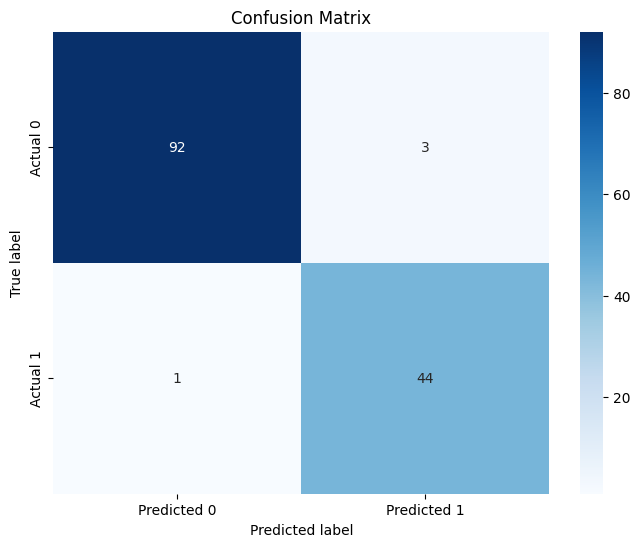

In [21]:
conf_matrix = confusion_matrix(Ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

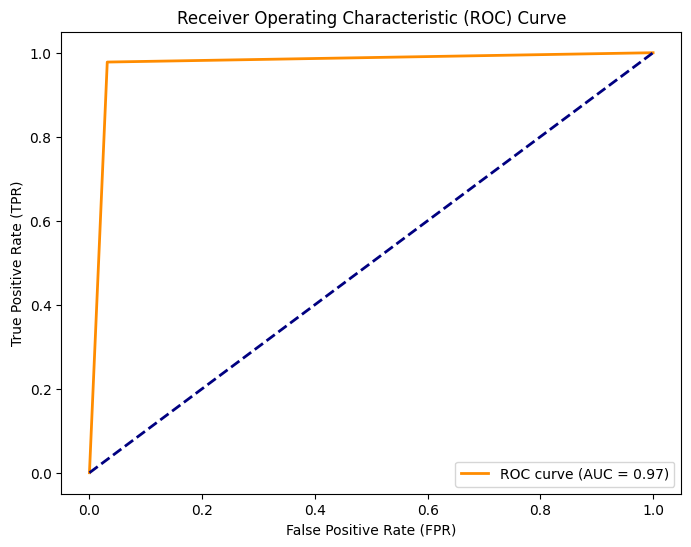

In [22]:
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
rf = RandomForestClassifier(ccp_alpha=0.045, max_depth=15, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=267)
rf.fit(Xtrain,Ytrain)
rf.score(Xtrain,Ytrain)

0.962432915921288

In [24]:
y_pred = rf.predict(Xtest)
rf_acc =accuracy_score(Ytest,y_pred)
print("accuracy: ",rf_acc*100)
report = classification_report(Ytest, y_pred)
print("Classification Report:\n", report)

accuracy:  97.14285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



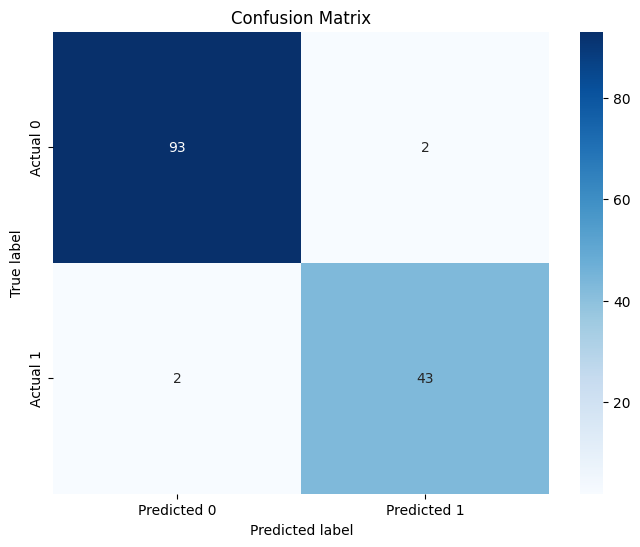

In [25]:
conf_matrix = confusion_matrix(Ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

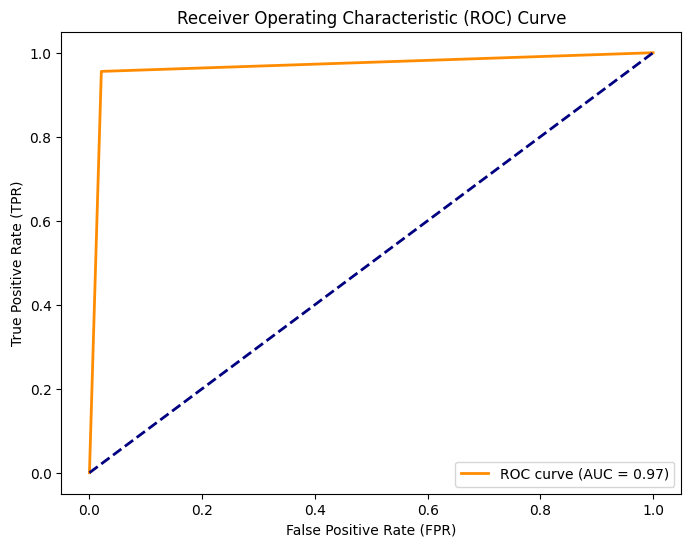

In [26]:
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:

lr = LogisticRegression(C=0.25, max_iter=250, multi_class='ovr', penalty='l1',
                   solver='saga', tol=0.001)
lr.fit(Xtrain,Ytrain)
lr.score(Xtrain,Ytrain)

0.9588550983899821

In [28]:
y_pred = lr.predict(Xtest)
lr_acc =accuracy_score(Ytest,y_pred)
print("accuracy: ",lr_acc*100)
report = classification_report(Ytest, y_pred)
print("Classification Report:\n", report)

accuracy:  96.42857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



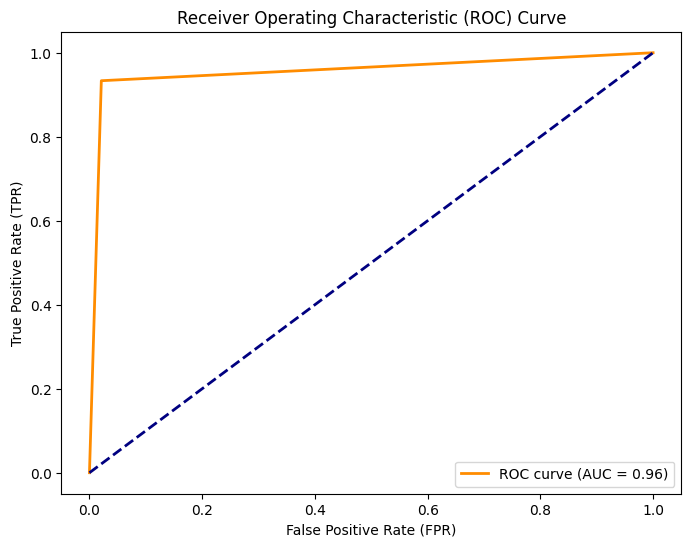

In [29]:
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:
dt = dt=DecisionTreeClassifier(ccp_alpha=0.05, max_features='sqrt', min_samples_leaf=12,
                       splitter='random')
dt.fit(Xtrain,Ytrain)
dt.score(Xtrain,Ytrain)

0.9033989266547406

In [31]:
y_pred = dt.predict(Xtest)
dt_acc =accuracy_score(Ytest,y_pred)
print("accuracy: ",dt_acc*100)
report = classification_report(Ytest, y_pred)
print("Classification Report:\n", report)

accuracy:  87.14285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        95
           1       0.94      0.64      0.76        45

    accuracy                           0.87       140
   macro avg       0.89      0.81      0.84       140
weighted avg       0.88      0.87      0.86       140



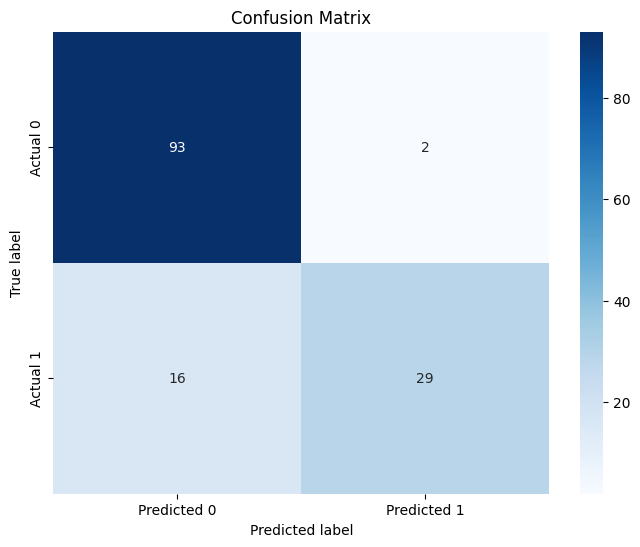

In [32]:
conf_matrix = confusion_matrix(Ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

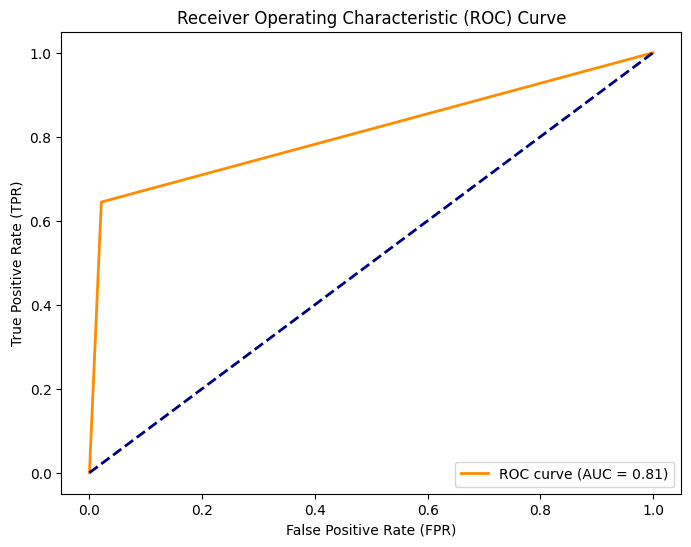

In [33]:
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
kn=KNeighborsClassifier(leaf_size=30, n_neighbors=13, p=1, weights='distance')
kn.fit(Xtrain,Ytrain)
kn.score(Xtrain,Ytrain)

0.998211091234347

In [35]:
y_pred= kn.predict(Xtest)
kn_acc =accuracy_score(Ytest,y_pred)
print("accuracy: ",kn_acc*100)
report = classification_report(Ytest, y_pred)
print("Classification Report:\n", report)

accuracy:  97.14285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



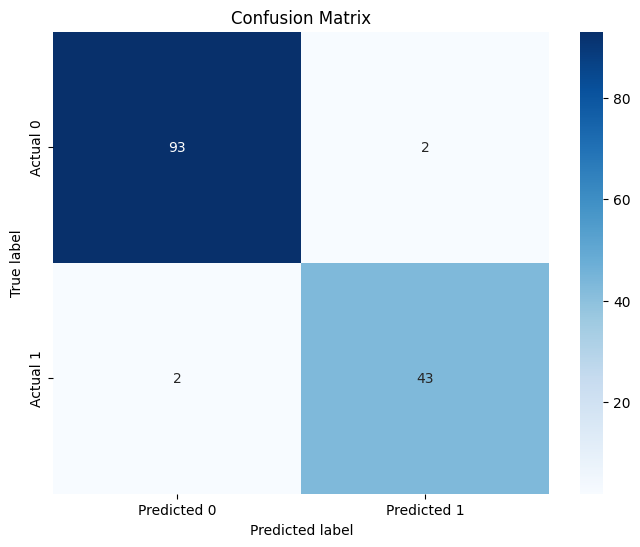

In [36]:
conf_matrix = confusion_matrix(Ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

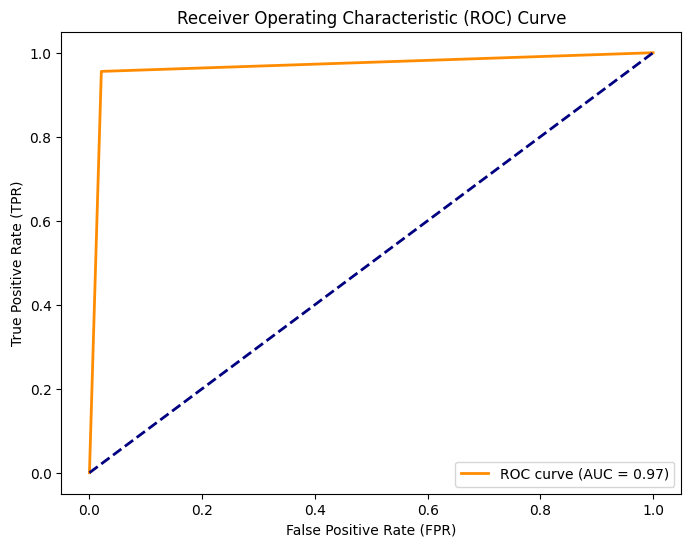

In [37]:
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [38]:
from sklearn.naive_bayes import GaussianNB


NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain, Ytrain)

# Predict the target variable on the test set
predicted_values = NaiveBayes.predict(Xtest)

# Calculate accuracy and append to the acc list
nb_acc =accuracy_score(Ytest, predicted_values)

print("Naive Bayes's Accuracy is: ", nb_acc  * 100)

# Print classification report
print()
print("Classification Report:")
print(classification_report(Ytest, predicted_values))


Naive Bayes's Accuracy is:  96.42857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



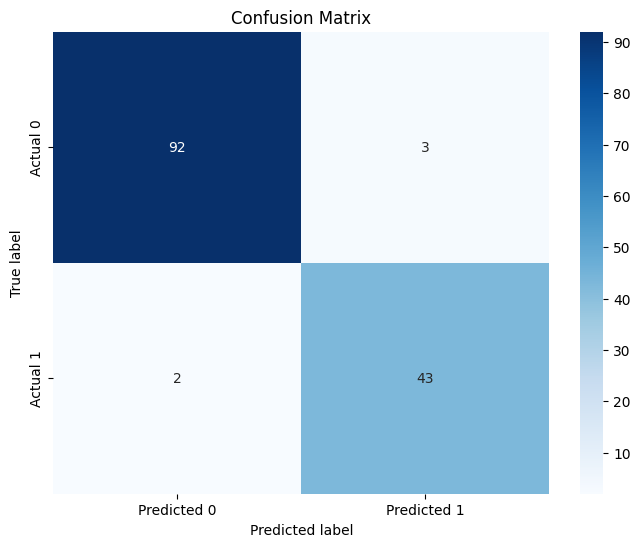

In [39]:
conf_matrix = confusion_matrix(Ytest, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

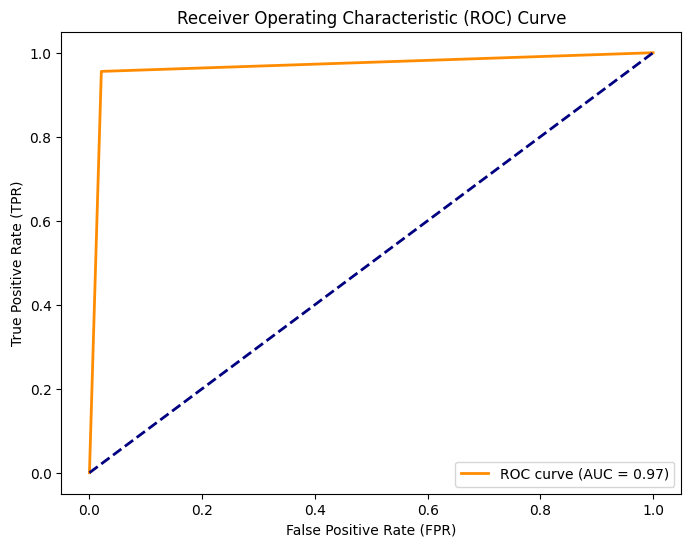

In [40]:
fpr, tpr, thresholds = roc_curve(Ytest, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
acc = [nb_acc*100, kn_acc*100, lr_acc*100, dt_acc*100, svc_acc*100, rf_acc*100]
model = ['Naive Bayes', 'KNN', 'Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest']

# Create a dictionary to store data
data = {'Algorithm': model, 'Accuracy': acc}

# Create a DataFrame
accuracy_table = pd.DataFrame(data)

# Print the accuracy table
print(accuracy_table)

             Algorithm   Accuracy
0          Naive Bayes  96.428571
1                  KNN  97.142857
2  Logistic Regression  96.428571
3        Decision Tree  87.142857
4                  SVM  97.142857
5        Random Forest  97.142857


In [42]:
import matplotlib.pyplot as plt
import seaborn as sn

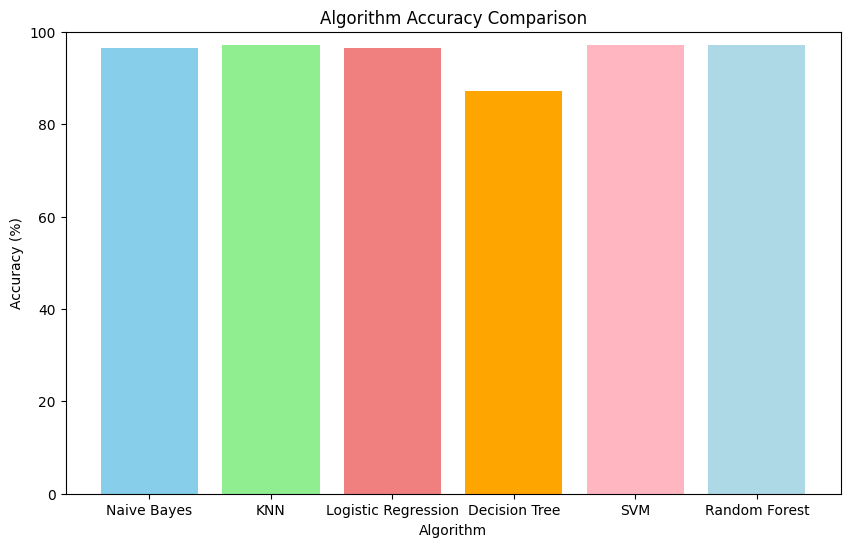

In [43]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'lightblue']

plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['Algorithm'], accuracy_table['Accuracy'], color=colors)
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for better visualization
plt.show()

In [44]:
import pickle
svm_model_pkl = open('BreastCancerPrediction_model.pkl', 'wb')
pickle.dump(svc, svm_model_pkl)
svm_model_pkl.close()

In [45]:
kn_model_pkl2 = open('BreastCancerPrediction_model2.pkl', 'wb')
pickle.dump(kn, kn_model_pkl2)
kn_model_pkl2.close()